# Tyson Model of Mutual Inhibition

![TysonUrl](https://media3.giphy.com/media/c3GZurAjgOIQE/200w.gif?cid=82a1493b6lfg8iq4eaxdrzo782o8fi4ow8qkwfdvelh34nr7&rid=200w.gif "tyson")

Implemented both deterministically and stochastically. <br>
Adapted from  MATLAB version written by Eric Sobie and Marc Birtwistle

Original Paper here:
https://www.sciencedirect.com/science/article/pii/S0955067403000176

# Model Diagram

![title](Tyson_Diagram.jpg)

In [5]:
#Import tellurium to build model. matplotlib can be used as a plotting library if we want more variety in our plotting options
from matplotlib import pyplot as plt
import tellurium as te

# Tellurium Code

We define model reactions and initial conditions here. S induces R synthesis and may be adjusted to observe different outcomes

In [9]:
model = te.loada('''

// Reactions:

#Basal R production
  ->R; k0

#S induced R synthesis
   ->R; k1r*S

#R degradation
R->  ; (k2r+k3r*E)*R

#E phosphorylation by R which degrades R
R->  ; (k2e*R*E)/(Km2e+E)

#E dephosphrylation
   ->E; (k1e*(Etot-E))/(Km1e+(Etot-E))

#Convert concentration to number of molecules. 
#F is conversion factor equal to Volume of cell*Avagadro's Number
# := indicates a repeated assignment

nE := E*F
nR := R*F


// Species Initializations:

R = 30
E = 0.02


// Variable initializations:
k0 = 0
k1r = 0.25
k2r = 0.1
k3r = 0.2 #0.5
k1e = 1      
k2e = 0.2    
Km1e = 0.05
Km2e = 0.05
V = 4.18E-18   #L
F = V*(6.023E17)
S = 6  #change S for different simulations
Etot =1

''') 

# Deterministic Simulation

cvode is the default solver for Tellurium. Need to set it explicitly so we can easily switch between deterministic and stochastic simulations


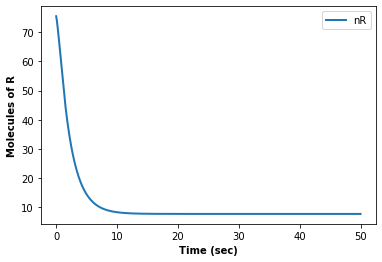

In [10]:
#Deterministic
model.resetAll()
model.setIntegrator('cvode')
resDet = model.simulate(0,50,1000,['time','nR'])
model.plot(resDet,xtitle  = 'Time (sec)',ytitle = 'Molecules of R')

# Stochastic Simulation

We will switch the solver to the Gillespie algorithm to enable stochastic simulations.
We can set a seed for the integrator if we want to reproduce the same stochastic simulation each time. 

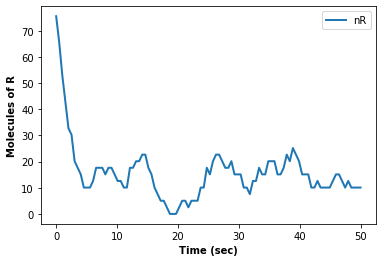

In [11]:
#Stochastic
model.resetAll()
model.setIntegrator('gillespie')
model.integrator.seed = 1234
resStoch = model.simulate(0,50,100,['time','nR'])
model.plot(resStoch,xtitle = 'Time (sec)',ytitle = 'Molecules of R')